# Contest: Black Friday - Analytics Vidhya
---
<a href='https://datahack.analyticsvidhya.com/contest/black-friday/'>Contest: Black Friday - Analytics Vidhya</a>

## Project Overview
### Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.
### Data
<pre>
Variable                    Definition

User_ID                     User ID

Product details:
Product_ID                  Product ID
Product_Category_1          Product Category (Masked)
Product_Category_2          Product may belongs to other category also (Masked)
Product_Category_3          Product may belongs to other category also (Masked)

Customer demographics:
Gender                      Sex of User
Age                         Age in bins
Occupation                  Occupation (Masked) (Besch&auml;ftigung)
City_Category               Category of the City (A,B,C)
Stay_In_Current_City_Years  Number of years stay in current city
Marital_Status              Marital Status

Target:
Purchase                    Purchase Amount (Target Variable)
</pre>
### Evaluation Metric
Submissions are scored on the root mean squared error (RMSE).

$RMSE = \sqrt{\frac 1n \sum_{i=1}^n {(y-\hat y)^2}}$

## General

In [1]:
import os
from collections import defaultdict
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings ("ignore", category=FutureWarning)


DATA_TRAIN = os.path.join ('data', 'train.csv')
DATA_TEST = os.path.join ('data', 'test.csv')
FILE_SUBMISSION = os.path.join ('data', 'project.ml.blackfriday.submission.csv')

## Data Exploration

In [2]:
data_raw = pd.read_csv (DATA_TRAIN)
display (data_raw.head ())

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# characteristics of data scales
data_char = defaultdict (list)
for col in data_raw.keys ():
    data_char[col] = np.sort (data_raw[col].unique ())

for key in data_char:
    print (key, '/', len (data_char[key]), '/', data_char[key])

User_ID / 5891 / [1000001 1000002 1000003 ... 1006038 1006039 1006040]
Product_ID / 3631 / ['P00000142' 'P00000242' 'P00000342' ... 'P0099742' 'P0099842' 'P0099942']
Gender / 2 / ['F' 'M']
Age / 7 / ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
Occupation / 21 / [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
City_Category / 3 / ['A' 'B' 'C']
Stay_In_Current_City_Years / 5 / ['0' '1' '2' '3' '4+']
Marital_Status / 2 / [0 1]
Product_Category_1 / 20 / [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Product_Category_2 / 18 / [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. nan]
Product_Category_3 / 16 / [ 3.  4.  5.  6.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. nan]
Purchase / 18105 / [   12    13    14 ... 23959 23960 23961]


Data scales:

Product_Category_1: nominal scaled

Product_Category_2 and \_3: same as Prodcut_Category_1, NaN present

Occupation: nominal scaled

Marital_Status: nominal scaled

Gender: nominal scaled, [F, M]

Age: in bins , metric ratio scale in classes

Stay_In_Current_City_Years: metric ratio scale

City_Category: ordinal scale, [A, B, C]

Purchase: metric scaled

## Benchmark
It is a contest project -  due to submission, benchmarking against leaderboard

## Metric

In [4]:
def rmse_metric (y_true, y_pred):
    mse = ((y_true - y_pred)**2).mean ()
    return np.sqrt (mse)

## Data Preprocessing

In [5]:
# Data Preprocessing
print ('Step:', 'Data Preprocessing', '...', end = ' ', flush = True)

data_raw = pd.read_csv (DATA_TRAIN)

# replace NaN values with 0
fillna_cols = ['Product_Category_2', 'Product_Category_3']
data_raw[fillna_cols] = data_raw[fillna_cols].fillna (0)

# convert to same type as Product_Category_1
data_raw[fillna_cols] = data_raw[fillna_cols].astype (data_raw['Product_Category_1'].dtype)

# characteristics of data scales
data_char = defaultdict (list)
for col in data_raw.keys ():
    data_char[col] = np.sort (data_raw[col].unique ())

# append new category to existent data_char
data_char['Product_Category_1'] = np.append (0, data_char['Product_Category_1'])

# convert to type category
cat_cols = ['Age', 'Product_ID', 'Occupation', 'Gender', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
for col in data_raw[cat_cols].keys ():
    data_raw[col] = data_raw[col].astype ('category', categories=data_char[col])

# 'Product_Category_2', 'Product_Category_3' are same as Product_Category_1
prod_cols = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']
data_raw[prod_cols] = data_raw[prod_cols].astype ('category', categories=data_char['Product_Category_1'])
# set categories of Product_Category_1
data_raw['Product_Category_1'] = data_raw['Product_Category_1'].cat.set_categories (data_char['Product_Category_1'])
data_raw['Product_Category_2'] = data_raw['Product_Category_2'].cat.set_categories (data_char['Product_Category_1'])
data_raw['Product_Category_3'] = data_raw['Product_Category_3'].cat.set_categories (data_char['Product_Category_1'])

# make a copy - not needed, just for my information copied from Jupyter Notebook
data_wrk = data_raw.copy (deep = True)

for col in data_wrk.columns:
    if (str (data_wrk[col].dtype) == 'category'):
        data_wrk[col] = data_wrk[col].values.codes

# Make X and y for training
drop_cols = ['User_ID', 'Purchase']
X = data_wrk.drop (drop_cols, axis=1).values
y = data_wrk['Purchase'].values

print ('done')

Step: Data Preprocessing ... done


## Implementation  // DTR
with grid search and cross-validation

In [6]:
print ('Step:', 'Implementation', '...', end = ' ', flush = True)

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = dict (
    max_depth = [5, 10, 11, 12, 15]
)

scoring = make_scorer (rmse_metric)

dtr = DecisionTreeRegressor (
    criterion = 'mse',
    max_depth = 5
)

gscv = GridSearchCV (
    estimator = dtr,
    param_grid = param_grid,
    scoring = scoring,
    cv = 4,
    return_train_score = True,
    #n_jobs = -1 # parallelism, does currently not work for my own metric
)

# grid search includes cross-validation > no need to split data beforehand
gscv.fit (X, y)

print ('done')

Step: Implementation ... done


## Evaluation and Validation

In [7]:
gscv_df = pd.DataFrame (gscv.cv_results_)
display (gscv_df)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.548182,0.005592,0.010098,0.000088,5,{'max_depth': 5},3366.125716,3353.505412,3358.457219,3487.337339,3391.356421,55.596721,1,3343.233118,3347.243742,3345.652996,3501.451048,3384.395226,67.597296
1,0.910595,0.015547,0.017775,0.004470,10,{'max_depth': 10},2839.943378,2824.672320,2817.324413,2832.708904,2828.662254,8.486833,3,2788.216511,2797.678930,2785.951173,2795.282626,2791.782310,4.840956
2,0.974883,0.014002,0.016539,0.004192,11,{'max_depth': 11},2820.581596,2807.993101,2799.210142,2831.597023,2814.845465,12.297724,4,2745.978784,2757.318345,2747.115622,2758.754331,2752.291771,5.780948
3,1.026860,0.013533,0.016217,0.003881,12,{'max_depth': 12},2814.401218,2804.634223,2793.969862,2827.714810,2810.180028,12.437971,5,2704.805025,2712.764298,2703.178984,2721.521731,2710.567509,7.290703
4,1.191237,0.016366,0.025170,0.004191,15,{'max_depth': 15},2864.099578,2870.141077,2869.326401,2875.574886,2869.785486,4.067675,2,2537.484902,2538.347710,2528.870294,2552.311916,2539.253705,8.400619


### Model Complexity Graph

[]

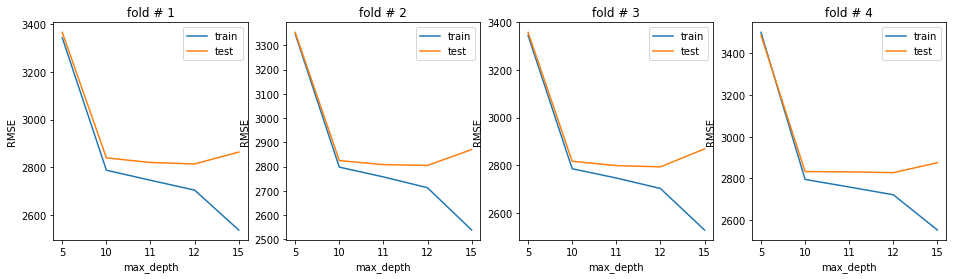

In [8]:
x_labels = []
for i in gscv_df.index:
    label = str (gscv_df['param_max_depth'].values[i])
    x_labels.append (label)

fig, ax = plt.subplots (1, gscv.n_splits_)

i = 0
for i in range (gscv.n_splits_):
    ax[i].plot (gscv_df['split' + str (i) + '_train_score'])
    ax[i].plot (gscv_df['split' + str (i) + '_test_score'])
    ax[i].legend (['train', 'test'])
    ax[i].set_ylabel ('RMSE')
    ax[i].set_xlabel ('max_depth')
    ax[i].set_xticklabels (x_labels)
    ax[i].set_xticks (np.arange (0, len (x_labels), 1))
    ax[i].set_title ('fold # ' + str (i+1))

#plt.tight_layout ()
fig.set_size_inches (16, 4)
plt.plot ()

As of max_depth = 9, the regressor starts to overfit, since training and validation error diverge.

Nevertheless, the best results come with max_depth = 12, since train and val error are minimal enough and std of errors is minimal as well as close to each other.

## Retrain with optimal parameters

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# shuffle data and split into train and test set
X_train, X_val, y_train, y_val = train_test_split (
    X,
    y,
    test_size = 0.25,
    shuffle = True,
    random_state = 42
)

# feed data into learning algorithm
dtr_opt = DecisionTreeRegressor (
    criterion = 'mse',
    max_depth = 12
)

dtr_opt.fit (X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [10]:
# Evaluation
print ('R2 score', 'train', dtr_opt.score (X_train, y_train))
print ('R2 score', 'val  ', dtr_opt.score (X_val, y_val))

y_train_pred = dtr_opt.predict (X_train)
y_val_pred = dtr_opt.predict (X_val)
print ('RMSE', 'train', rmse_metric (y_train, y_train_pred))
print ('RMSE', 'val', rmse_metric (y_val, y_val_pred))

R2 score train 0.7120909138092575
R2 score val   0.6876040423339225
RMSE train 2696.603845711641
RMSE val 2803.216782263172


## Predicition
Not done here

## Conclusion
RMSE test error of submitted work = 2806 and close to RMSE validation error = 2803.

## Improvements (possible)
- using other learning algorithm: SVR, Ensemble Methods or MLP
- feature engineering with MCA or CatPCA and one-hot encoding